In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [ ]:
# Загрузим датасет, познакомимся с данными.
Data_Yotube = pd.read_csv('/content/Global YouTube Statistics.csv',
                       encoding='latin1')
Data_Yotube.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


interval columns not set, guessing: ['rank', 'subscribers', 'video views', 'uploads', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'created_date', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']


/usr/local/lib/python3.10/dist-packages/phik/phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(


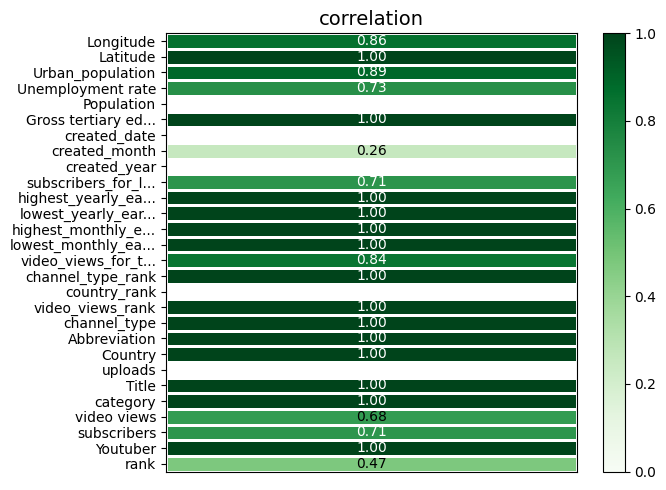

In [ ]:
# Проведем разведывательный анализ. Для начала посмотрим, какие данные с какими коррелируются.
# Увидим глобальный коэффициент корреляции.

!pip install phik
import phik
from phik.report import plot_correlation_matrix
global_correlation, global_labels = Data_Yotube.global_phik()

plot_correlation_matrix(global_correlation,
                        x_labels=[''], y_labels=global_labels,
                        vmin=0, vmax=1,
                        color_map="Greens",
                        fontsize_factor=1)
plt.tight_layout()

In [ ]:
# Наимение значимые столбцы это: Population(население), created_date (дата создания канала), год имесяц создания канала,
# рейтинг канала на основе его подписчиков, uploads (общее колличество видео загруженных на канал.)

# С точки зрения интуитивной логики и столбцов, где коеф. корреляции, близится к 1 выстроим наш датафрейм, чтобы с ним было удобно работать.
Data_Yotube_1 = Data_Yotube.rename(columns={'rank':'Ранг по подписчикам', 'uploads':'Количество видео', 'Youtuber':'Название канала', 'subscribers':'Количество подписчиков', 'subscribers_for_last_30_days':'Подписчики за месяц', 'category':'Категория', 'video views':'Просмотры видео', 'Country':'Страна', 'video_views_rank':'Рейтинг по видио', 'country_rank':'Рейтинг по подписчикам', 'channel_type':'Тип канала', 'channel_type_rank':'Рейтинг от типа канала', 'lowest_yearly_earnings':'Min годовой зароботок', 'highest_yearly_earnings':'Max годовой зароботок'})

Data_Yotube_2 = pd.DataFrame(Data_Yotube_1)
Data_Yotuber = Data_Yotube_2[['Название канала', 'Количество видео', 'Страна', 'Ранг по подписчикам', 'Количество подписчиков', 'Подписчики за месяц', 'Просмотры видео', 'Категория', 'Тип канала', 'Рейтинг по видио', 'Рейтинг по подписчикам', 'Рейтинг от типа канала', 'Min годовой зароботок', 'Max годовой зароботок']]

Data_Yotuber

,Название канала,Количество видео,Страна,Ранг по подписчикам,Количество подписчиков,Подписчики за месяц,Просмотры видео,Категория,Тип канала,Рейтинг по видио,Рейтинг по подписчикам,Рейтинг от типа канала,Min годовой зароботок,Max годовой зароботок
0,T-Series,20082,India,1,245000000,2000000.0,2.280000e+11,Music,Music,1.0,1.0,1.0,6800000.00,1.084000e+08
1,YouTube Movies,1,United States,2,170000000,NaN,0.000000e+00,Film & Animation,Games,4055159.0,7670.0,7423.0,0.04,5.800000e-01
2,MrBeast,741,United States,3,166000000,8000000.0,2.836884e+10,Entertainment,Entertainment,48.0,1.0,1.0,4000000.00,6.470000e+07
3,Cocomelon - Nursery Rhymes,966,United States,4,162000000,1000000.0,1.640000e+11,Education,Education,2.0,2.0,1.0,5900000.00,9.480000e+07
4,SET India,116536,India,5,159000000,1000000.0,1.480000e+11,Shows,Entertainment,3.0,2.0,2.0,5500000.00,8.750000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Natan por Aï¿,1200,Brazil,991,12300000,700000.0,9.029610e+09,Sports,Entertainment,525.0,55.0,172.0,1700000.00,2.650000e+07
991,Free Fire India Official,1500,India,992,12300000,300000.0,1.674410e+09,People & Blogs,Games,6141.0,125.0,69.0,194200.00,3.100000e+06
992,Panda,2452,United Kingdom,993,12300000,1000.0,2.214684e+09,NaN,Games,129005.0,867.0,1202.0,201.00,3.200000e+03
993,RobTopGames,39,Sweden,994,12300000,100000.0,3.741235e+08,Gaming,Games,35112.0,4.0,69.0,11600.00,1.858000e+05


interval columns not set, guessing: ['Количество видео', 'Ранг по подписчикам', 'Количество подписчиков', 'Подписчики за месяц', 'Просмотры видео', 'Рейтинг по видио', 'Рейтинг по подписчикам', 'Рейтинг от типа канала', 'Min годовой зароботок', 'Max годовой зароботок']


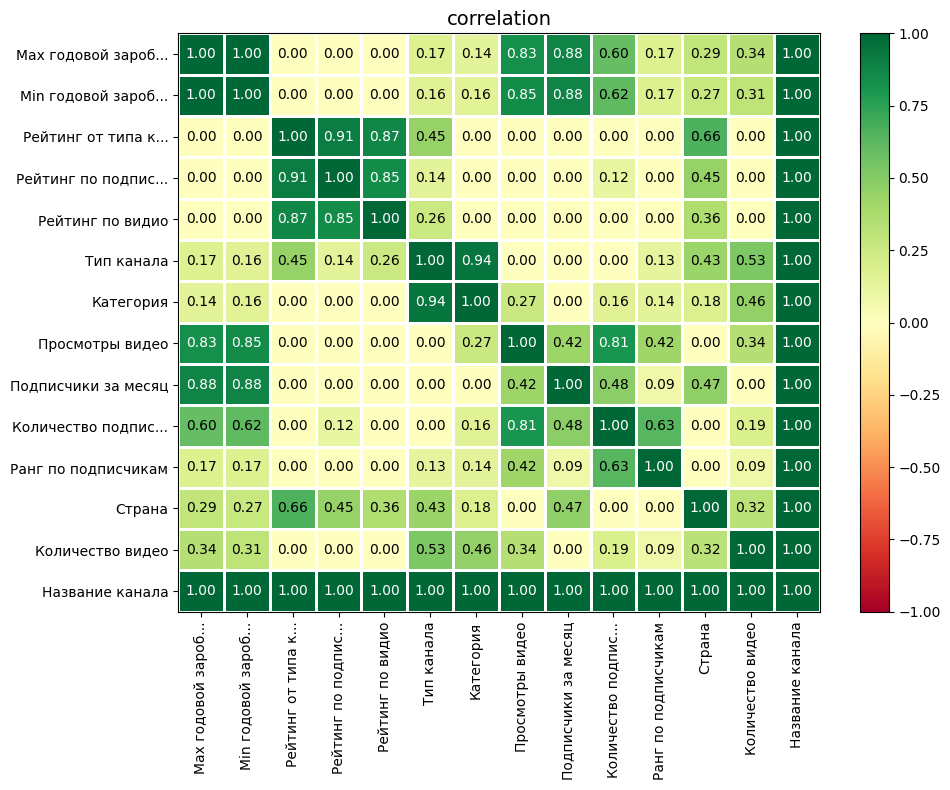

In [ ]:
# Построим матрицу корреляций.
phik_overview = Data_Yotuber.phik_matrix()
phik_overview

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, figsize=(10,8))

In [ ]:
# Согласно матрице корреляции прослеживается взаимосвязь между:
# MAX/MIN годовым предполагаемым доходом (между этими столбцами друг с другом) и кол-вом просмотров видео и кол-вом подписчиков за последний месяц
# Страной и рейтингом от типа канала.
# Количеством подписчиков и просмотров видео.
# Категорией и типом канала
# Между всеми данными по рейтингам.

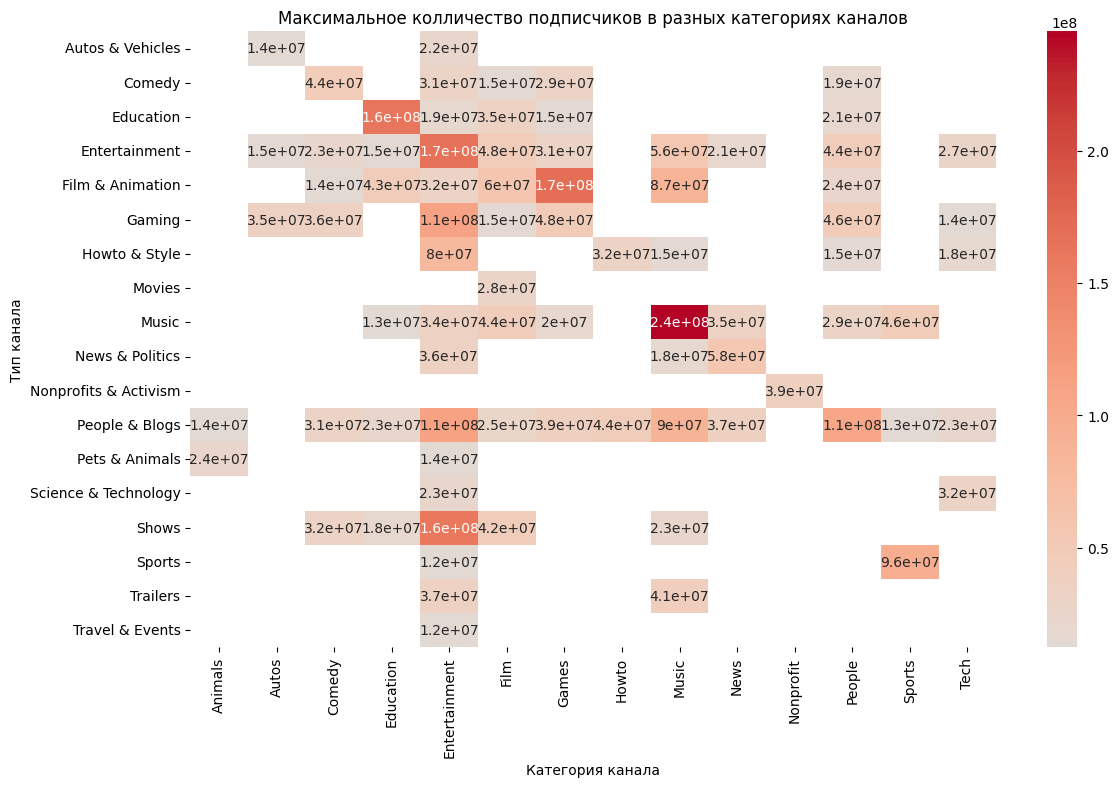

In [ ]:
# Гипотеза: Максимальное количество подписчиков у нас на музыкальных каналах. Построим тепловую карту.

# Сделаем сводную таблицу:
podp = pd.pivot_table(data=Data_Yotuber, index='Категория', columns='Тип канала', values='Количество подписчиков', aggfunc= 'max')

plt.figure(figsize=[13,8])
sns.heatmap(podp, annot=True, cmap='coolwarm', center=0.11)
plt.title("Максимальное колличество подписчиков в разных категориях каналов")
plt.xlabel("Категория канала")
plt.ylabel("Тип канала")

plt.show()

In [ ]:
# По тепловой карте мы видим, что действительно, более всего подписчиков на музыкальных каналах. Заодно можно выделить спортивные, каналы посвященные играм, развлечениям и обучающие и каналы.

<BarContainer object of 5 artists>

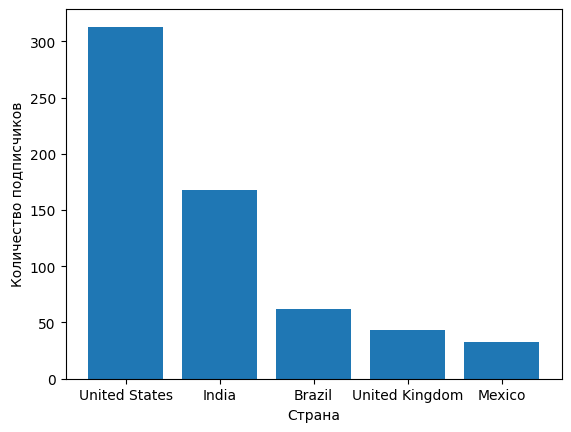

In [ ]:
# Определим топ, пятерку стран, где создано больше всего каналов Ютуба.

strana =  Data_Yotuber['Страна'].value_counts().head(5)

plt.xlabel('Cтрана')
plt.ylabel('Количество подписчиков')
plt.bar(x=strana.index, height=strana.values)

# Первое место - США, на втором Индия, на третьем Бразилия.

In [ ]:
# Сколько в среднем от максимального значения мы сможем заработать в каждом типе канала и какой тип канала самый доходный?
# Построим сводную таблицу. Посчитаем среднее от максимального планируемого дохода.
type_dengi = pd.pivot_table(data=Data_Yotuber, index='Категория', columns= 'Тип канала', values='Max годовой зароботок')
SR = type_dengi.agg(["mean"])
SR

Тип канала,Animals,Autos,Comedy,Education,Entertainment,Film,Games,Howto,Music,News,Nonprofit,People,Sports,Tech
mean,41800000.0,5.666707e+06,4.495311e+06,6.761775e+06,8.084598e+06,6.354803e+06,4.278745e+06,2.980382e+06,6.668660e+06,6.247381e+06,4700000.0,1.581528e+06,2.642210e+06,2219870.048


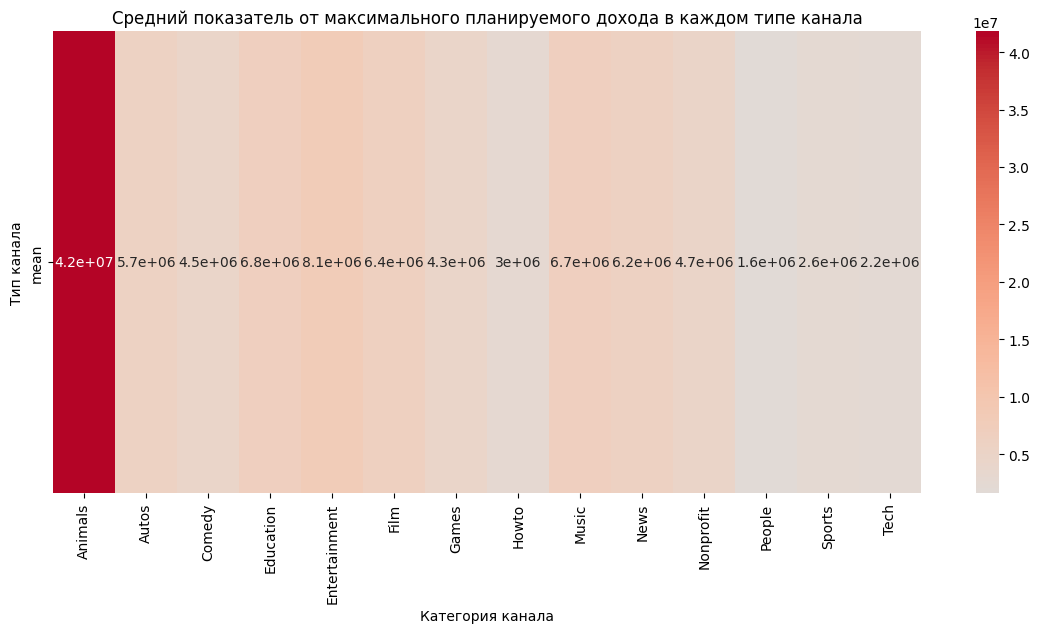

In [ ]:
# При визуализации мы видим, что от каналов про животных планируется в среднем самый большой доход.
plt.figure(figsize=[14,6])
sns.heatmap(SR, annot=True, cmap='coolwarm', center=3)
plt.title("Средний показатель от максимального планируемого дохода в каждом типе канала")
plt.xlabel("Категория канала")
plt.ylabel("Тип канала")

plt.show()

In [ ]:
# Получим данные у каких каналов(канала) самые высокий показатель рейтинга по просмотру видео,
# по колличеству подписчиков и в зависимости от типа канала. Из кода ниже мы видим, что
# канал со странным названием "yyyyyyy" имеет самый большой показатель во всех трех рейтингах.
rating_1 = (Data_Yotuber[['Название канала', 'Рейтинг по видио']]).agg(["max"])
rating_2 = (Data_Yotuber[['Название канала', 'Рейтинг по подписчикам']]).agg(["max"])
rating_3 = (Data_Yotuber[['Название канала', 'Рейтинг от типа канала']]).agg(["max"])

In [ ]:
rating_1

,Название канала,Рейтинг по видио
max,ýýýýýýýýýýýýýýýýýýýýýý,4057944.0


In [ ]:
rating_2

,Название канала,Рейтинг по подписчикам
max,ýýýýýýýýýýýýýýýýýýýýýý,7741.0


In [ ]:
rating_3

,Название канала,Рейтинг от типа канала
max,ýýýýýýýýýýýýýýýýýýýýýý,7741.0


,proportion
Тип канала,
Entertainment,0.315026
Music,0.223834
People,0.104663
Games,0.101554
Comedy,0.052850


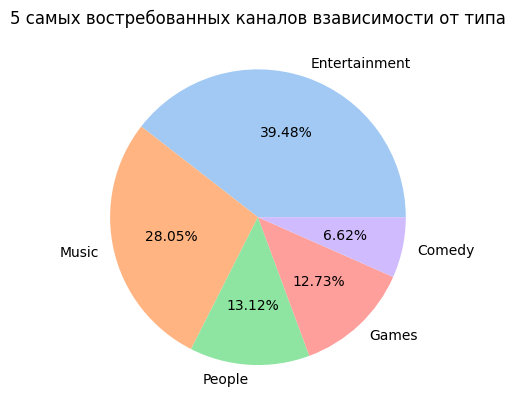

In [ ]:
# Увидим в процентном соотношении пятерку самых востребованных каналов в зависимости от его типа.
rc = Data_Yotuber["Тип канала"].value_counts(normalize=True).head(5)
display(rc)

colors = sns.color_palette('pastel')
plt.pie(rc, labels=rc.index, colors=colors, autopct='%.2f%%')
plt.title("5 самых востребованных каналов взависимости от типа")
plt.show()

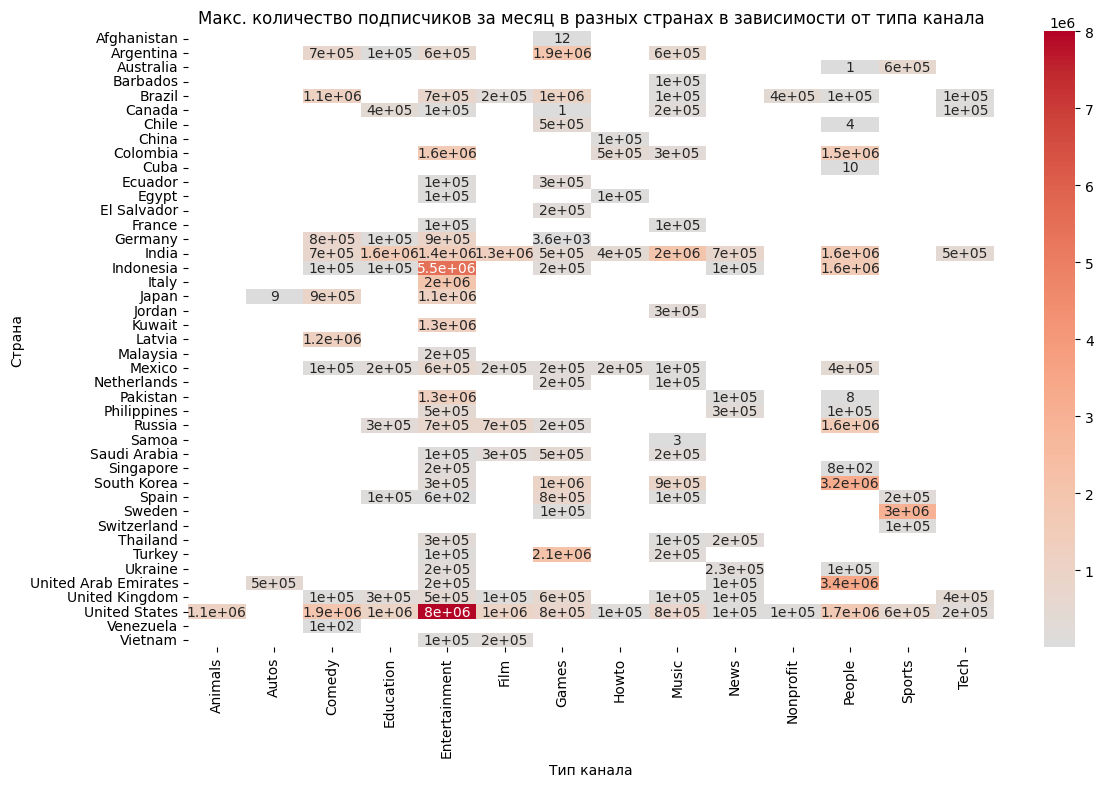

In [ ]:
# Посмотрим на максимальное колличество подписчиков за последний месяц, по странам в разрезе типов каналов.

# Создадим сводную таблицу.
contry = pd.pivot_table(data=Data_Yotuber, index='Страна', columns='Тип канала', values='Подписчики за месяц', aggfunc= 'max')
plt.figure(figsize=[13,8])
sns.heatmap(contry, annot=True, cmap='coolwarm', center=0.11)
plt.title("Макс. количество подписчиков за месяц в разных странах в зависимости от типа канала")
plt.xlabel("Тип канала")
plt.ylabel("Страна")

plt.show()

# Из визуализации видно, что на развлекательных каналах (entertainment) в Америке было больше всего подписчиков.
# А так же в Индонезии на этом же типе каналов, а так же в Арабских Эмиратах больше всего подписчиков на калалах типа People.

In [ ]:
# Для начала оставим только нужные столбцы
korr = Data_Yotuber[['Количество подписчиков', 'Просмотры видео']]
korr

,Количество подписчиков,Просмотры видео
0,245000000,2.280000e+11
1,170000000,0.000000e+00
2,166000000,2.836884e+10
3,162000000,1.640000e+11
4,159000000,1.480000e+11
...,...,...
990,12300000,9.029610e+09
991,12300000,1.674410e+09
992,12300000,2.214684e+09
993,12300000,3.741235e+08


In [ ]:
# Убираем строки, где количество просмотров равно нулю
korr_filtered = korr[korr['Просмотры видео'] > 0]
korr_filtered

,Количество подписчиков,Просмотры видео
0,245000000,2.280000e+11
2,166000000,2.836884e+10
3,162000000,1.640000e+11
4,159000000,1.480000e+11
6,112000000,9.324704e+10
...,...,...
990,12300000,9.029610e+09
991,12300000,1.674410e+09
992,12300000,2.214684e+09
993,12300000,3.741235e+08


In [ ]:
# Теперь расчитаем коэффициент корреляции Пирсона:
correlation = korr_filtered['Количество подписчиков'].corr(korr_filtered['Просмотры видео'])
print(f"Коэффициент корреляции Пирсона: {correlation}")

Коэффициент корреляции Пирсона: 0.8242619797868961


In [ ]:
# Определяем X (features) и y (target). Признак у нас "Просмотры видео", а целевая переменная "Количество подписчиков".
# Разделим данные на обучающую и тестовую выборки (80%/20%).
X_filtered = korr_filtered[['Просмотры видео']]
y_filtered = korr_filtered['Количество подписчиков']

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

In [ ]:
# Построим модель линейной регрессии:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Спрогнозируем на тестовой выборке.
y_pred = model.predict(X_test)
y_pred

array([20282505.2601175 , 27857053.69019244, 14087816.94377478,
       15081717.87891796, 29535403.21632939, 25375663.22931853,
       14316363.10027655, 36708644.66080359, 38610108.04721317,
       21136065.554633  , 32461964.0533765 , 30718254.68557345,
       19067485.21843058, 30265451.54839473, 13606057.45921254,
       15826906.56773324, 16351262.14799238, 31909978.36388074,
       55412954.59105632, 13893018.68747297, 20494322.49411169,
       13408274.01899519, 13344035.13777788, 22826885.80078454,
       12019000.14035246, 13696736.72142149, 13489121.05396778,
       12876436.01215628, 13760696.50527958, 30223226.87480308,
       29833406.59492783, 21504974.13071954, 18218032.93449319,
       14820599.48454142, 13411739.13686401, 18265154.79635644,
       32163814.42954176, 16821740.56322807, 12996604.88966797,
       27408256.65765581, 21164532.31028578, 40514589.41248865,
       39839760.87816046, 18616133.82009361, 43046209.93316695,
       24122591.10724811, 23464654.41540

In [ ]:
# Рассчитываем точность модели (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE) на тестовой выборке: {mse}")

Среднеквадратичная ошибка (MSE) на тестовой выборке: 69261160622424.805


In [ ]:
# Теперь повторяем то же самое без фильтрации нулевых значений в данных.
# Оставляем только столбцы "Количество подписчиков" и "Просмотры видео", где просмотры видио у нас остается признаком, а подписчики целевой переменной.
X_all = Data_Yotuber[['Просмотры видео']]
y_all = Data_Yotuber['Количество подписчиков']

In [ ]:
# Разделяем данные на обучающую и тестовую выборки (80%/20%)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

In [ ]:
# Строим модель линейной регрессии
model_all = LinearRegression()
model_all.fit(X_train_all, y_train_all)

LinearRegression()

In [ ]:
# Прогнозируем на тестовой выборке:
y_pred_all = model_all.predict(X_test_all)

In [ ]:
# Рассчитываем точность модели (MSE) на данных с нулевыми значениями.
# Значение у нас действительно изменилось: было: 69261160622424.805 а стало 70915829314711.92.
mse_all = mean_squared_error(y_test_all, y_pred_all)
print(f"Среднеквадратичная ошибка (MSE) без удаления строк с нулевыми просмотрами: {mse_all}")

Среднеквадратичная ошибка (MSE) без удаления строк с нулевыми просмотрами: 70915829314711.92


In [ ]:
Data_Yotuber_1 = Data_Yotuber[['Категория', 'Просмотры видео', 'Количество подписчиков', 'Количество видео']]
Data_Yotuber_1

,Категория,Просмотры видео,Количество подписчиков,Количество видео
0,Music,2.280000e+11,245000000,20082
1,Film & Animation,0.000000e+00,170000000,1
2,Entertainment,2.836884e+10,166000000,741
3,Education,1.640000e+11,162000000,966
4,Shows,1.480000e+11,159000000,116536
...,...,...,...,...
990,Sports,9.029610e+09,12300000,1200
991,People & Blogs,1.674410e+09,12300000,1500
992,NaN,2.214684e+09,12300000,2452
993,Gaming,3.741235e+08,12300000,39


In [ ]:
# Отфильтруем строки, где количество просмотров не равно нулю
df_filtered_1 = Data_Yotuber_1[Data_Yotuber_1['Просмотры видео'] > 0]
df_filtered_1

,Категория,Просмотры видео,Количество подписчиков,Количество видео
0,Music,2.280000e+11,245000000,20082
2,Entertainment,2.836884e+10,166000000,741
3,Education,1.640000e+11,162000000,966
4,Shows,1.480000e+11,159000000,116536
6,People & Blogs,9.324704e+10,112000000,1111
...,...,...,...,...
990,Sports,9.029610e+09,12300000,1200
991,People & Blogs,1.674410e+09,12300000,1500
992,NaN,2.214684e+09,12300000,2452
993,Gaming,3.741235e+08,12300000,39


In [ ]:
# Найдем две самые популярные категории и закодируем целевую переменную Категория( category) с помощью LabelEncoder
top_categories = df_filtered_1['Категория'].value_counts().head(2).index
df_filtered_1 = df_filtered_1[df_filtered_1['Категория'].isin(top_categories)]

In [ ]:
label_encoder = LabelEncoder()
df_filtered_1['category_encoded'] = label_encoder.fit_transform(df_filtered_1['Категория'])

<ipython-input-88-f5a546541ea6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_1['category_encoded'] = label_encoder.fit_transform(df_filtered_1['Категория'])


In [ ]:
# Теперь выберем признаки (X) и целевую переменную (y).
X = df_filtered_1[['Просмотры видео', 'Количество подписчиков', 'Количество видео']]
y = df_filtered_1['category_encoded']

In [ ]:
# Разделим данные на 2 выборки. Обучающуу и тестовую, и построим модель логистической регрессии.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Сделаем прогноз на тестовой выборке и расчитаем точность модели на тестовой выборке.
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

Точность модели: 0.6404494382022472


In [ ]:
# Чтобы посмотреть на изменение признаков выберем другие столбцы для модели, исключим "количество видео" как признак.
X_alternate = df_filtered_1[['Просмотры видео', 'Количество подписчиков']]
X_alternate.head()

,Просмотры видео,Количество подписчиков
0,2.280000e+11,245000000
2,2.836884e+10,166000000
9,7.718017e+10,98900000
10,5.785629e+10,96700000
17,2.082699e+10,75600000


In [ ]:
# Для новой модели разделим выборки и снова построим модель регрессии.
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alternate, y, test_size=0.2, random_state=13)

model_alt = LogisticRegression(max_iter=1000)
model_alt.fit(X_train_alt, y_train_alt)

LogisticRegression(max_iter=1000)

In [ ]:
# Прогнозируем на тестовой выборке
y_pred_alt = model_alt.predict(X_test_alt)
y_pred_alt

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1])

In [ ]:
# И расчитаем точность модели. Отсюда мы видим, что значение изменилось. Было 0.6404494382022472, а стало 0.5955056179775281.
accuracy_alt = accuracy_score(y_test_alt, y_pred_alt)
print(f"Точность модели с измененными признаками: {accuracy_alt}")

Точность модели с измененными признаками: 0.5955056179775281
